# Naive Bayes Classifiers 

Let a discrete-valued features $x \in \{1,...,K\}^D$ where $K$ is the number of values for each feature and D is the number of features. We will use a generative approach. 

\begin{equation}
p(\boldsymbol{x}|y=c,\theta) = \prod_{j=1}^Dp(x_j|y=c,\theta_{jc})
\end{equation}


the resulting model is called a *Naive Bayes Classifier* (NBC)

In the case of binary features, x_j $\in \{0,1\}$, we can use the Bernoulli distribution $p($**x**$|y=x, \theta) = \prod_{j=1}^D Ber(x_{j}|\mu_{jc})$ where $\mu_{jc}$ is the probability that feature $j$ occur in class $c$

In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
D = 2 # numbers of features or the dimension of data
K = 1 # number of values for each feature
C = 4 # number of classes 

mu_d = np.random.random((C,D))
print('means')
print(mu_d)

means
[[0.74018215 0.63822358]
 [0.62861624 0.76504147]
 [0.5248847  0.87962325]
 [0.17018888 0.21577429]]


In [110]:
N = 1000 #number of samples
inputs = []
labels = []
for label, mu in enumerate(mu_d):
    features = []
    for f in mu:
        feat = np.random.binomial(K, f, N)
        features.append(feat)
    stacked = np.stack(features, axis=-1)
    inputs.append(stacked)
    labels.append([label]*N)
    print('-'*100)

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [113]:
x = np.array(inputs)
print(x[0])

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 0]]


In [100]:
x = np.array(inputs)
X = x.reshape(-1, x.shape[-1])
y = np.array(labels)
Y = y.flatten()

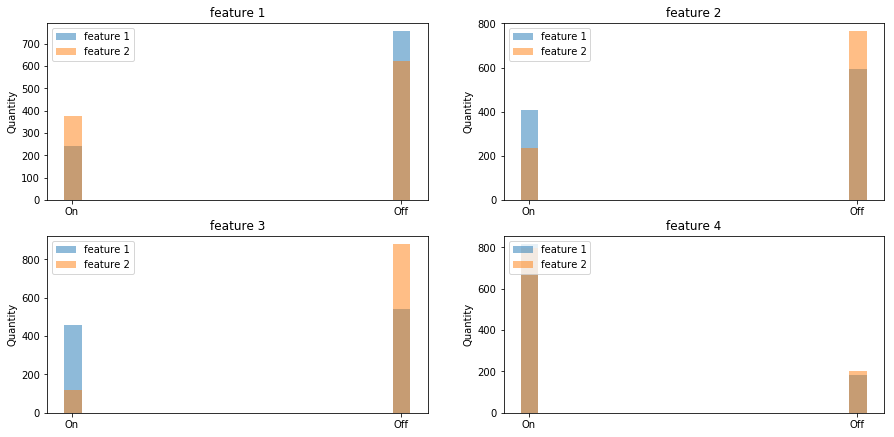

In [178]:
plt.figure(figsize=(15,15))
for i, x_ in enumerate(x):
    t = int(str(42)+str(i+1))
    plt.subplot(t)
    plt.hist(x_[:,0],bins=20, alpha=0.5, label='feature 1')
    plt.hist(x_[:,1],bins=20, alpha=0.5, label='feature 2')
    tex = 'feature '+str(i+1)
    plt.title(tex)
    plt.ylabel('Quantity')
    plt.xticks([0.022,0.972], ['On','Off'])
    plt.legend(loc='upper left')
plt.show()

In [179]:
print(X.shape)
print(Y.shape)

(4000, 2)
(4000,)


### Model Fitting

We now discuss how to train a naive Bayes classifier. This usually means computing the MLE or MAP estimate for the parameters. However, we will also discuss how to compute the full posterior, $p(\theta|D)$

In [180]:
from sklearn.utils import shuffle
X_, Y_ = shuffle(X,Y)
x_train = X_[0:700]
y_train = Y_[0:700]
x_test  = X_[700:]
y_test  = Y_[700:]

The probability for a single data case is given by 
\begin{equation}
p(x_i, y_i |\theta) \\
= p(y_i|\pi)\prod_jp(x_{ij}|\theta_j) \\
= \prod_c\pi_c^{\boldsymbol{1}{\{y_i = c\}}}\prod_j\prod_c p(x_{ij}|\theta_{jc})^{\boldsymbol{1}\{y_i = c\}}
\end{equation}

Hence the log-likelihood is given by
\begin{equation}
log(p(D|\theta)) = \sum_{c=1}^CN_c\log{\pi_c}+\sum_{j=1}^D\sum_{c=1}^C\sum_{i:y_i=c}\log{p(x_{ij}|\theta_{jc}})
\end{equation}

We can see that this expression decomposes into a series of terms, obe concerning $\pi$ and $DC$ terms containing the $\theta_{jc}$'s. Hence we can optimize all these parameters separately.

\begin{equation}
\hat{\pi}_{c} = \frac{N_c}{N}
\end{equation}

where $N_c \doteq \sum_i \boldsymbol{1}(x_{ij}=1, y_i=c)$ is the number of examples in class $c$ where feature $j$ turns on.

The MLE for the likelihood depends on the type of distribution we choose to use for each feature. For simplicity, let us suppose all features are binary, so $x_j\ |\ y=c \sim Ber(\theta_{jc})$. In this case, MLE becomes: 
<center>
$\begin{equation}
\hat{\theta_{jc}} = \hat{P}(x_j|y=c) = \frac{N\hat{P}(x_j=1, y=c)}{N\hat{P}(y=c)} = \frac{N_{jc}}{N_c}
\end{equation}$
</center>
where $N_{jc}  \doteq  \sum_i\boldsymbol{1}(x_{ij}=1, y_i=c) $ is the number of examples in class $c$ where feature $j$ turns on.

In [258]:
#ALGORITHM
N_c = []
N_jc = []
for c in np.unique(y_train):
    Nc  = 0
    Njc = 0
    for i, y_label in enumerate(y_train):
        if c == y_label:
            Nc = Nc + 1
            partial = []
            Njc = 0
            for j in range(0, D):
                if x_train[i][j] == 1:
                    Njc = Njc + 1
                partial.append(Njc)
    N_c.append(Nc)
    N_jc.append(Njc)

#Making operations
pi_c  = np.divide(N_c, N, dtype='float')
theta_jc = np.divide(N_jc, N_c, dtype='float') 
print( 'pi: {}'.format(pi_c))
print( 'theta: {}'.format(theta_jc))

pi: [0.165 0.183 0.172 0.18 ]
theta: [1.36363636 1.45355191 1.39534884 0.44444444]


In [259]:
# Extracting counts from unique labels in training set
_ , c_quantities = np.unique(y_train, return_counts=True)

#Algorithm + making operation
pi_c_2  = np.divide(c_quantities, N, dtype='float')
theta = [np.count_nonzero(x_train[y_train == k]) for k in np.unique(y_train)]
theta_jc_2 = np.divide(theta,c_quantities, dtype = 'float')
print( 'pi: {}'.format(pi_c_2))
print( 'theta: {}'.format(theta_jc_2))

pi: [0.165 0.183 0.172 0.18 ]
theta: [1.36363636 1.45355191 1.39534884 0.44444444]


In [43]:
x_train

array([[8.0871654 , 0.99960758],
       [8.00013958, 0.98327572],
       [8.1317888 , 0.99148135],
       ...,
       [4.96550422, 5.55074321],
       [7.08830387, 1.33678579],
       [4.31177861, 6.44718303]])

In [44]:
x_0 = x_train[y_train == 0]
x_1 = x_train[y_train == 1]
x_2 = x_train[y_train == 2]
x_3 = x_train[y_train == 3]

In [45]:
mu_star = [np.divide(np.sum(x_0, axis=0), x_0.shape[0]),
           np.divide(np.sum(x_1, axis=0), x_1.shape[0]),
           np.divide(np.sum(x_2, axis=0), x_2.shape[0]),
           np.divide(np.sum(x_3, axis=0), x_3.shape[0])]

In [46]:
sigma_star = [np.divide(np.subtract(x_0, mu_star[0]), x_0.shape[0]),
              np.divide(np.subtract(x_1, mu_star[1]), x_1.shape[0]),
              np.divide(np.subtract(x_2, mu_star[2]), x_2.shape[0]),
              np.divide(np.subtract(x_3, mu_star[3]), x_3.shape[0])]

In [50]:
x_test

array([[8.01479181, 0.98480965],
       [7.90831191, 8.49172351],
       [7.52213801, 2.66864032],
       ...,
       [8.22311706, 7.71971491],
       [7.15378545, 2.05389821],
       [4.54516318, 5.86586775]])

The trouble with maximum likelihood is that it can overfit. A simple solution is to be Bayesian.

### Bayesian naive Bayes
For simplicity, we will use a facotred prior